In [133]:
import pandas as pd
import numpy as np
import os 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, classification_report, precision_score
import pickle


# chargement du dataset

In [134]:
#afficher le répertoire courant
os.getcwd()
#Changer de répertoire de travail
os.chdir(r'C:\Users\CAPITAINE PIRLO\Downloads')

In [135]:
#Chargement du DF
data = pd.read_excel('Coeur.xlsx')
data.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [136]:
#Travailler avec une copie du data Frame pour éviter de le rechager en cas d'êrreur
df = data.copy()

In [137]:
#Afficher les informations relatives au DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# le pre_traitement des données

In [138]:
#Normalisation des variables quantitatives
for col in df.drop('CŒUR', axis =1).select_dtypes(np.number).columns:
    df[col] = df[col]/df[col].max()


In [139]:
#Vérification des résultats
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,0.519481,homme,AA,0.70,0.479270,0.0,Normal,0.851485,Non,0.000000,Ascendant,0
1,0.636364,femme,DNA,0.80,0.298507,0.0,Normal,0.772277,Non,0.161290,Plat,1
2,0.480519,homme,AA,0.65,0.469320,0.0,ST,0.485149,Non,0.000000,Ascendant,0
3,0.623377,femme,ASY,0.69,0.354892,0.0,Normal,0.534653,Oui,0.241935,Plat,1
4,0.701299,homme,DNA,0.75,0.323383,0.0,Normal,0.603960,Non,0.000000,Ascendant,0


In [140]:
#Encodage des variables qualitatives
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype('category').cat.codes

In [141]:
#Vérification des résultats
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,0.519481,1,0,0.70,0.479270,0.0,1,0.851485,0,0.000000,0,0
1,0.636364,0,3,0.80,0.298507,0.0,1,0.772277,0,0.161290,2,1
2,0.480519,1,0,0.65,0.469320,0.0,2,0.485149,0,0.000000,0,0
3,0.623377,0,1,0.69,0.354892,0.0,1,0.534653,1,0.241935,2,1
4,0.701299,1,3,0.75,0.323383,0.0,1,0.603960,0,0.000000,0,0


In [142]:
#Séparer la variable cible (coeur) et les variables explicatives
y = df['CŒUR']
x = df.drop('CŒUR', axis = 1)

In [143]:
#Subdivision du jeu de données en apprentissage et en test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state =1)
#train_set, test_set = train_test_split(df,test_size =0.2, random_state =1)

In [144]:
#Vérifier le résultat
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(734, 11) (184, 11) (734,) (184,)


# regression logistique

In [145]:
#Création d'un objet lr de la classe LogisticRegression
lr = LogisticRegression(solver ='newton-cg', random_state =1)

In [146]:
#Apprentissage du modèle
model = lr.fit(x_train, y_train)
#model = lr.fit(train_set.drop('CŒUR', axis = 1), train_set['CŒUR'])

In [147]:
#Probabilité d'appartenance à l'une des classes
predict_proba = model.predict_proba(x_test)
predict_proba[:5,:]

array([[0.39560595, 0.60439405],
       [0.18843348, 0.81156652],
       [0.04970935, 0.95029065],
       [0.09007617, 0.90992383],
       [0.28158313, 0.71841687]])

In [148]:
#Application du modèle au données de test
y_pred = model.predict(x_test)
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [149]:
#matrice de confusion
mc = confusion_matrix(y_test, y_pred)
mc

array([[ 66,   8],
       [  6, 104]], dtype=int64)

In [150]:
#Taux de bonnes prédictions
accuracy = accuracy_score(y_test, y_pred)
accuracy
#Conclusion : le modèle produit 85.32 % de bonne prédiction.

0.9239130434782609

In [151]:
#Sensibilité
recall = recall_score(y_test, y_pred)
recall
#conclusion : lorsqu'un individu est malade, nous avons 84.11 % de chance que le modèle le prédise.

0.9454545454545454

In [152]:
#Précision
precision = precision_score(y_test, y_pred)
precision
#Conclusion : lorsque le modèle prédit qu'un individu est malade, nous avons 90 % de chace que cela soit vraie.

0.9285714285714286

In [153]:
#plus de détails avec classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        74
           1       0.93      0.95      0.94       110

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



In [154]:
#Modèle Trival
df['CŒUR'].value_counts()/df.shape[0]
#Conclusion : si nous nous basons sur le hasard pour faire nos prédiction, nous aurons 55.37 % de bonne prédiction.

1    0.553377
0    0.446623
Name: CŒUR, dtype: float64

In [155]:
#Score d'entrainement (le taux de bonne prédiction calculé sur la base des données d'entrainement)
model.score(x_train, y_train)

0.8433242506811989

In [156]:
#Score d'entrainement (le taux de bonne prédiction calculé sur la base des données de test)
model.score(x_test, y_test)

0.9239130434782609

In [157]:
# enregistrer le modèle
pickle.dump(lr, open('model.pkl', 'wb'))

# arbre de decision

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

In [159]:
arbre_1 = DecisionTreeClassifier(criterion='entropy')

In [160]:
# entrainement de notre modele

arbre_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [161]:
#Probabilité d'appartenance à l'une des classes
predict_proba = arbre_1.predict_proba(x_test)
predict_proba[:3,:]

array([[0., 1.],
       [1., 0.],
       [0., 1.]])

In [162]:
#Application du modèle au données de test
y_pred = arbre_1.predict(x_test)
y_pred[:10]

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [163]:
#matrice de confusion pour notre modèle d'arbre
mc = confusion_matrix(y_test, y_pred)
mc

array([[59, 15],
       [19, 91]], dtype=int64)

In [164]:
#Taux de bonnes prédictions de notre modèle
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8152173913043478

In [165]:
#Score d'entrainement (le taux de bonne prédiction calculé sur la base des données de test)
arbre_1.score(x_test, y_test)

0.8152173913043478

# la selection des variables avec la methode de variance threshold

In [166]:
# affichage de la variance des differentes variable
x.var(axis = 0)

AGE            0.015007
SEXE           0.166220
TDT            1.031849
PAR            0.008569
CHOLESTEROL    0.032906
GAJ            0.178968
ECG            0.399009
FCMAX          0.015886
ANGINE         0.241073
DEPRESSION     0.029593
PENTE          0.927369
dtype: float64

In [167]:
selector = VarianceThreshold(threshold=0.03)
selector.fit_transform(x)
selector.get_support()

array([False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True])

In [168]:
selected_col = np.array(x.columns)[selector.get_support()]
selected_col

array(['SEXE', 'TDT', 'CHOLESTEROL', 'GAJ', 'ECG', 'ANGINE', 'PENTE'],
      dtype=object)

In [169]:
x_1 = x.drop(columns=['AGE', 'PAR', 'FCMAX', 'DEPRESSION '], axis = 1)

In [179]:
#Subdivision du jeu de données en apprentissage et en test
x_train, x_test, y_train, y_test = train_test_split(x_1,y,test_size =0.2, random_state =1)
#train_set, test_set = train_test_split(df,test_size =0.2, random_state =1)


In [171]:
#Vérifier le résultat
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(734, 7) (184, 7) (734,) (184,)


In [172]:
arbre_2 = DecisionTreeClassifier(criterion='entropy')

In [173]:
# entrainement de notre modele de arbre_2

arbre_2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [174]:
#Score d'entrainement (le taux de bonne prédiction calculé sur la base des données de test) avec nos variables selectionnées
arbre_2.score(x_test, y_test)

0.8478260869565217

On obtient un bien meilleur score
essayons maintenant avec selectkbest

# selectKbest

In [175]:

from sklearn.feature_selection import SelectKBest,  chi2, f_classif

In [176]:
f_classif(x, y)

(array([ 79.16077949,  94.25318385,   0.88465909,  10.72722788,
         52.45972492,  70.47854341,   3.02632099, 174.91358529,
        296.14477082, 178.61512031, 536.97284497]),
 array([3.00795324e-18, 2.82189782e-21, 3.47176726e-01, 1.09531459e-03,
        9.30830888e-13, 1.75359801e-16, 8.22594715e-02, 1.13778598e-36,
        1.01301827e-57, 2.39077242e-37, 7.42020751e-94]))

In [177]:
selector_1 = SelectKBest(f_classif, k=1)
selector_1.fit_transform(x, y)
selector_1.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True])

In [132]:
selected_col = np.array(x.columns)[selector_1.get_support()]
selected_col

array(['PENTE'], dtype=object)

In [178]:
x_2 = x[np.array(x.columns)[selector_1.get_support()]]
x_2

,PENTE
0,0
1,2
2,0
3,2
4,0
...,...
913,2
914,2
915,2
916,2


In [183]:
#Subdivision du jeu de données en apprentissage et en test avec notre nouvelle feature x_2
x_train, x_test, y_train, y_test = train_test_split(x_2,y,test_size =0.2, random_state =1)
#train_set, test_set = train_test_split(df,test_size =0.2, random_state =1)
print(x_train)

     PENTE
852      2
121      0
664      2
187      2
108      0
..     ...
767      0
72       2
908      0
235      2
37       0

[734 rows x 1 columns]


In [186]:
#creation de notre objet arbre_3 et entrainement puis test.score
arbre_3 = DecisionTreeClassifier(criterion='entropy')
arbre_3.fit(x_train, y_train)
arbre_3.score(x_test, y_test)

0.8858695652173914

#la variable la plus pertinente est donc la pente selon f_classif et on obtient un bien meilleur modele avec elle encore

# creation de notre boucle avec SelectKBest

In [228]:
list_score = np.array([])
nbre_param = np.array([])
for i in range(1,12):
    selector_i = SelectKBest(f_classif, k=i)
    selector_i.fit_transform(x, y)
    selector_i.get_support()
    
    
    selected_col = np.array(x.columns)[selector_i.get_support()]
    
    x_i = x[np.array(x.columns)[selector_i.get_support()]]
    
    #Subdivision du jeu de données en apprentissage et en test avec notre nouvelle feature x_i
    x_train, x_test, y_train, y_test = train_test_split(x_i,y,test_size =0.2, random_state =1)
    #train_set, test_set = train_test_split(df,test_size =0.2, random_state =1)
    
    #creation de notre objet arbre_i et entrainement puis test.score
    arbre_i = DecisionTreeClassifier(criterion='entropy')
    arbre_i.fit(x_train, y_train)
    arbre_i.score(x_test, y_test)
    list_score = np.append(list_score,arbre_i.score(x_test, y_test), axis=None)
    nbre_param = np.append(nbre_param,len(list_score), axis=None)

print(list_score)
print(nbre_param)


[0.88586957 0.85869565 0.85869565 0.79891304 0.7826087  0.75
 0.75       0.81521739 0.7826087  0.80434783 0.79347826]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


Text(0, 0.5, 'test_score du model')

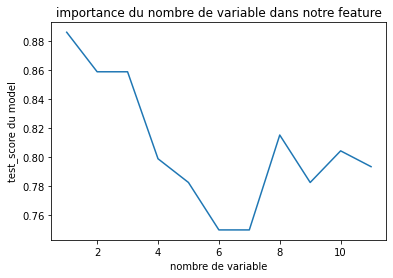

In [231]:
#tracé de notre graphe

plt.figure()
plt.plot(nbre_param, list_score)
plt.title('importance du nombre de variable dans notre feature')
plt.xlabel('nombre de variable')
plt.ylabel('test_score du model')

# recursive feature selection

In [46]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import SGDClassifier

In [47]:
selector = RFECV(SGDClassifier(), step=5, min_features_to_select=5, cv=5)
selector.fit(x, y)
selector.ranking_

array([3, 1, 3, 3, 1, 1, 3, 3, 2, 1, 1])